In [153]:
"""
Task 1 

1. 對於數據中的每一列：
   a. 說明該列的值是否與上表中給出的描述相符。
   b. 說明該列中缺失值的數量。
   c. 如果值不符合描述，描述您所採取的措施使其符合描述。
"""

'\nTask 1 \n\n1. 對於數據中的每一列：\n   a. 說明該列的值是否與上表中給出的描述相符。\n   b. 說明該列中缺失值的數量。\n   c. 如果值不符合描述，描述您所採取的措施使其符合描述。\n'

In [154]:
import numpy as np
import pandas as pd
import os

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

#設置 Matplotlib 配置，全局設置字體。
import matplotlib.pyplot as plt
from matplotlib import rcParams

# 設置支持繁體中文的字體
rcParams['font.sans-serif'] = ['Microsoft JhengHei']  # 例如使用微軟正黑體
rcParams['axes.unicode_minus'] = False  # 確保負號可以顯示

In [155]:
df = pd.read_csv(r"C:\Users\cgiks\Desktop\nkust\fitness_class_2212.csv") 
df.head() #顯示文件前五筆資料

,booking_id,months_as_member,weight,days_before,day_of_week,time,category,attended
0,1,17,79.56,8,Wed,PM,Strength,0
1,2,10,79.01,2,Mon,AM,HIIT,0
2,3,16,74.53,14,Sun,AM,Strength,0
3,4,5,86.12,10,Fri,AM,Cycling,0
4,5,15,69.29,8,Thu,AM,HIIT,0


In [156]:
df.info() #查看數據內容(名稱、非空值數量和數據類型)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   booking_id        1500 non-null   int64  
 1   months_as_member  1500 non-null   int64  
 2   weight            1480 non-null   float64
 3   days_before       1500 non-null   object 
 4   day_of_week       1500 non-null   object 
 5   time              1500 non-null   object 
 6   category          1500 non-null   object 
 7   attended          1500 non-null   int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 93.9+ KB


In [157]:
df.months_as_member.unique() #檢查months_as_member(會員的月數)，有多少個不同的值

array([ 17,  10,  16,   5,  15,   7,  11,   9,  23,  13,   8,  22,   6,
        33,  24,  14,   2,  12,  26,  28,  27,   1,   3,  21,  18,  19,
        53,  20,  34,  25,  32,  73,  55,   4,  35,  54,  76,  62,  42,
       105,  90,  29,  60,  30, 107,  52,  37,  38,  48,  51,  40,  89,
        57,  36,  44,  39,  41,  47,  58,  66,  45,  43,  61,  50,  65,
        31,  97,  59,  93, 148, 111,  69], dtype=int64)

In [158]:
df.days_before.unique() #檢查days_before(會員在報名課程開始前的天數)，文件內提到days，導致它被歸類為object。

array(['8', '2', '14', '10', '6', '4', '9', '12', '5', '3', '7', '13',
       '12 days', '20', '1', '15', '6 days', '11', '13 days', '3 days',
       '16', '1 days', '7 days', '8 days', '10 days', '14 days', '17',
       '5 days', '2 days', '4 days', '29'], dtype=object)

In [159]:
df['days_before'] = df['days_before'].str.replace(' days', '').astype('int64') #修正數據類型
#replace方法來刪除字符串中的 ' days' 部分，且轉換為整數類型

In [160]:
df['days_before'].value_counts().index.sort_values() #輸出結果

Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20, 29], dtype='int64', name='days_before')

In [161]:
df.day_of_week.unique() #檢查day_of_week(星期幾上課)，明顯有些地方有重覆到'Wednesday'、'Fri.'、'Monday'。

array(['Wed', 'Mon', 'Sun', 'Fri', 'Thu', 'Wednesday', 'Fri.', 'Tue',
       'Sat', 'Monday'], dtype=object)

In [162]:
df['day_of_week'] = df['day_of_week'].str[:3] #將一週的天數縮寫為只有三個字元。

day_mapping = { #映射到對應的數字
    'Mon': 1,
    'Tue': 2,
    'Wed': 3,
    'Thu': 4,
    'Fri': 5,
    'Sat': 6,
    'Sun': 7
}

df['day_of_week'] = df['day_of_week'].map(day_mapping)

In [163]:
df.day_of_week.unique() #輸出結果

array([3, 1, 7, 5, 4, 2, 6], dtype=int64)

In [164]:
df.time.unique() #檢查time(上課的時間)，無異常。

array(['PM', 'AM'], dtype=object)

In [165]:
df.category.unique() #檢查category(健身課的類別)，有一個類別為“-”，讓我們將其替換為'unknown'。
"""
HIIT 高強度間歇運動
Cycling 飛輪單車
Strength 力量
Yoga 瑜伽
Aqua 水中健身
"""

'\nHIIT 高強度間歇運動\nCycling 飛輪單車\nStrength 力量\nYoga 瑜伽\nAqua 水中健身\n'

In [166]:
df['category']=df['category'].replace('-', 'unknown')
df.category.value_counts() #'unknown'有13筆。

category
HIIT        667
Cycling     376
Strength    233
Yoga        135
Aqua         76
unknown      13
Name: count, dtype: int64

In [167]:
df.attended.value_counts() #檢查attended(成員是否參加了課程 1 或未參加課程 0)

attended
0    1046
1     454
Name: count, dtype: int64

In [168]:
df.weight.sort_values() #檢查weight，有些數據出現了NA

142     55.41
138     57.83
150     58.13
738     58.24
933     58.42
        ...  
1119      NaN
1266      NaN
1336      NaN
1363      NaN
1416      NaN
Name: weight, Length: 1500, dtype: float64

In [169]:
df.isnull().sum() #NA有20筆

booking_id           0
months_as_member     0
weight              20
days_before          0
day_of_week          0
time                 0
category             0
attended             0
dtype: int64

In [170]:
df['weight']= df['weight'].fillna(df['weight'].mean()) #用 weight 列的平均值替換其中的所有空值（NaN）。
df.isnull().sum() 

booking_id          0
months_as_member    0
weight              0
days_before         0
day_of_week         0
time                0
category            0
attended            0
dtype: int64

In [171]:
df.info() #數據清洗後，再次查看內容

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   booking_id        1500 non-null   int64  
 1   months_as_member  1500 non-null   int64  
 2   weight            1500 non-null   float64
 3   days_before       1500 non-null   int64  
 4   day_of_week       1500 non-null   int64  
 5   time              1500 non-null   object 
 6   category          1500 non-null   object 
 7   attended          1500 non-null   int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 93.9+ KB


In [172]:
"""
Task 2

創建一個可視化圖表，顯示有多少預訂參加課程。
a. 說明變量 attended 的哪個(健身課類別)有最多觀察值。
b. 解釋觀察值是否在 attended 變量的各個類別中平衡分佈。
"""

'\nTask 2\n\n創建一個可視化圖表，顯示有多少預訂參加課程。\na. 說明變量 attended 的哪個(健身課類別)有最多觀察值。\nb. 解釋觀察值是否在 attended 變量的各個類別中平衡分佈。\n'

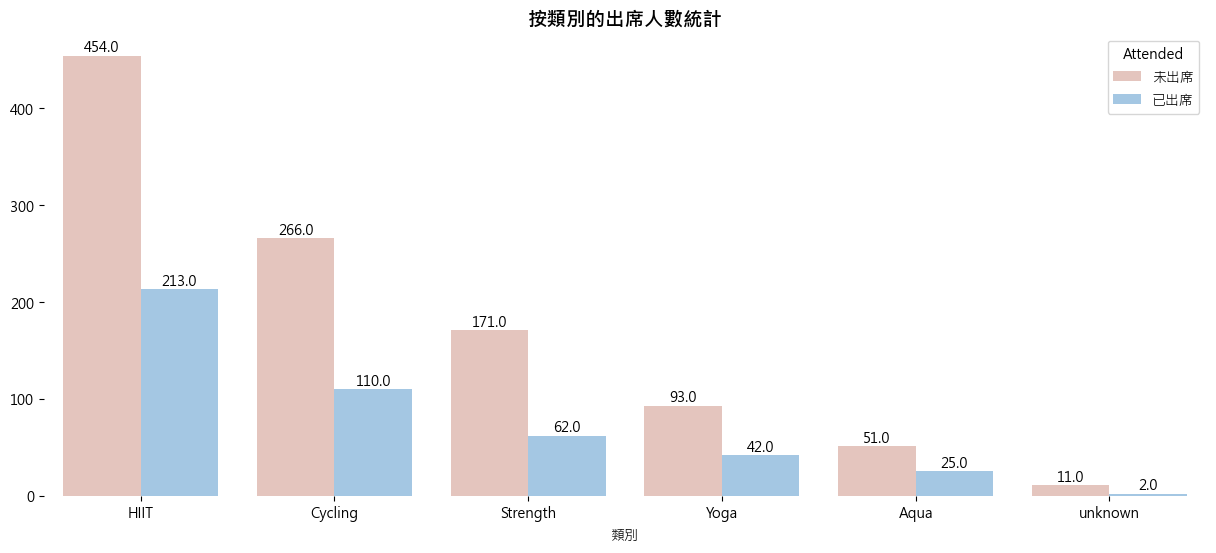

In [173]:
#要計算每個類別的計數

#計算每個類別的計數並排序
category_counts = df['category'].value_counts().reset_index()
category_counts.columns = ['category', 'count']
category_counts = category_counts.sort_values(by='count', ascending=False)

#設置圖表大小
plt.figure(figsize =(15,6))

# 繪製計數圖，將 'attended' 列临时转换为字符串
ax = sns.countplot(data=df, x='category', palette=["#ebc1b7", "#9ac8ed"], hue=df['attended'].astype(str), order=category_counts['category'])

#添加數據標籤
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

#設置圖表標題和標籤
plt.xlabel('類別')
plt.ylabel("")
plt.title('按類別的出席人數統計', size=14, weight="bold")
plt.legend(title='Attended', labels=['未出席', '已出席'])

#美化圖表
sns.despine(left=True, bottom=True)

#展示圖表
plt.show();

In [174]:
#上述HIIT的觀測值最多，為213。
"""
HIIT 高強度間歇運動
Cycling 飛輪單車
Strength 力量
Yoga 瑜伽
Aqua 水中健身
"""

'\nHIIT 高強度間歇運動\nCycling 飛輪單車\nStrength 力量\nYoga 瑜伽\nAqua 水中健身\n'

<Figure size 1500x500 with 0 Axes>

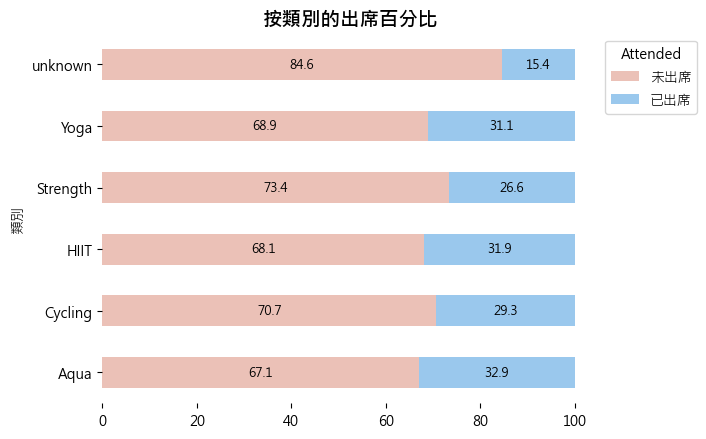

In [175]:
#創建一個類別和出席情況的交叉表。

#計算交叉表（crosstab）並標準化
ct = round(pd.crosstab(df['category'], df['attended'], normalize='index') * 100,1)

#設置圖形大小
plt.figure(figsize=(15, 5))

#繪製堆疊條形圖
ax = ct.plot(kind='barh', stacked=True, color= ["#ebc1b7", "#9ac8ed"])

#設置標籤和標題
plt.ylabel('類別')
plt.xlabel("")
plt.title('按類別的出席百分比', size=14, weight="bold")

#設置圖例
plt.legend(title='Attended', labels=['未出席', '已出席'], bbox_to_anchor=(1, 1))

#為條形添加標籤
for container in ax.containers:
    ax.bar_label(container, label_type='center', fontsize=9, color='black')

#美化圖表
sns.despine(left=True, bottom=True)

#顯示圖表
plt.show()

In [176]:
#上述不同(健身課的類別)中出席率的差異。

In [177]:
"""
Task 3

描述作為會員的月數分佈，顯示分佈的可視化圖表。
"""

'\nTask 3\n\n描述作為會員的月數分佈，顯示分佈的可視化圖表。\n'

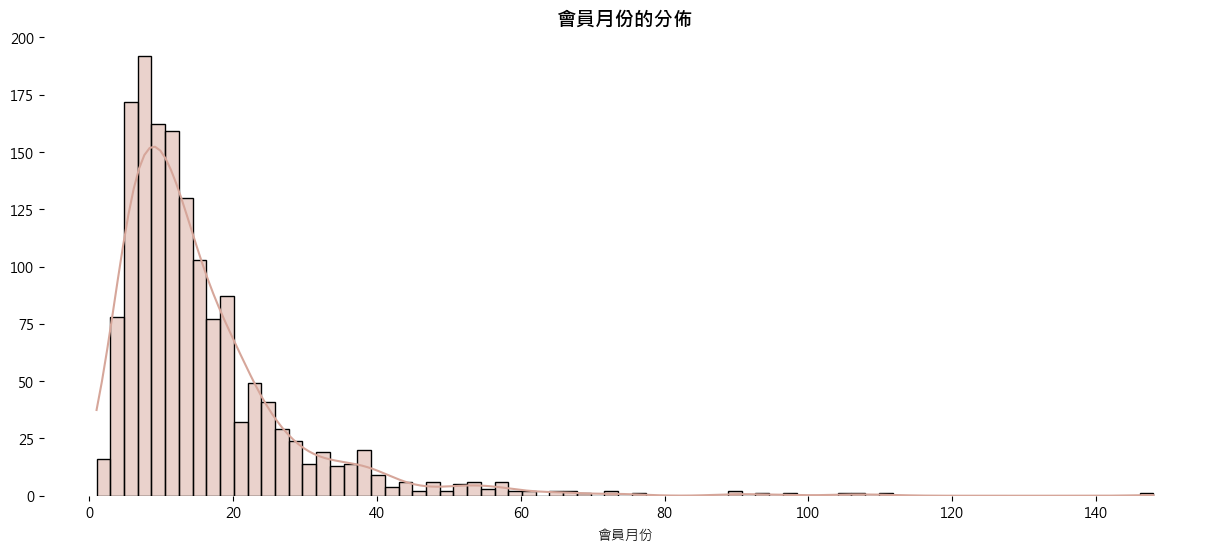

In [178]:
#設置圖形大小
plt.figure(figsize=(15, 6))

#繪製直方圖
sns.histplot(data=df, x='months_as_member', kde=True, color="#d6a69a")

#設置標籤和標題
plt.xlabel('會員月份')
plt.ylabel("")
plt.title('會員月份的分佈', size=14, weight="bold")

#美化圖表
sns.despine(left=True, bottom=True)

#顯示圖表
plt.show()

In [179]:
#會員月份10~20個月比例為最大宗。

In [180]:
"""
Task 4

描述出席情況與作為會員的月數之間的關係。
"""

'\nTask 4\n\n描述出席情況與作為會員的月數之間的關係。\n'

<Figure size 1500x500 with 0 Axes>

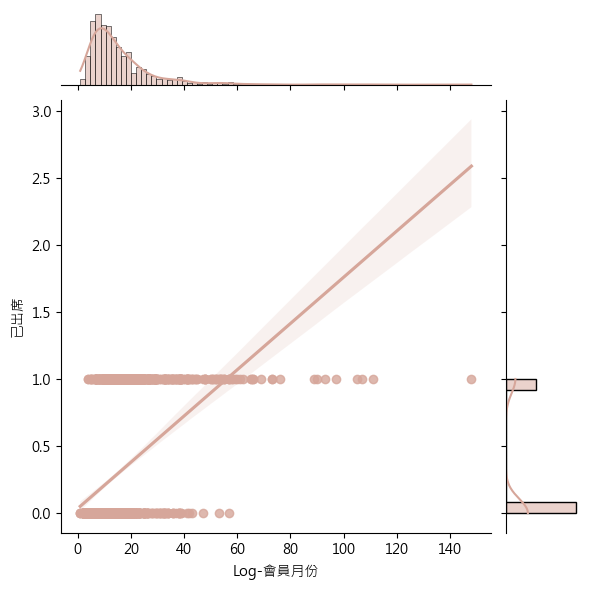

In [181]:
#設置圖形大小
plt.figure(figsize=(15, 5))

#繪製聯合圖
sns.jointplot(data=df, x='months_as_member', y='attended', kind="reg", color="#d6a69a")

#設置軸標籤
plt.xlabel('Log-會員月份')
plt.ylabel("已出席")

#展示圖表
plt.show();

In [182]:
#聯合圖的散點部分顯示了每個點的會員月份和出席次數，而回歸線則試圖表示這兩個變量之間的趨勢。這條線表明，隨著會員月份的增加，出席次數也有增加的趨勢。

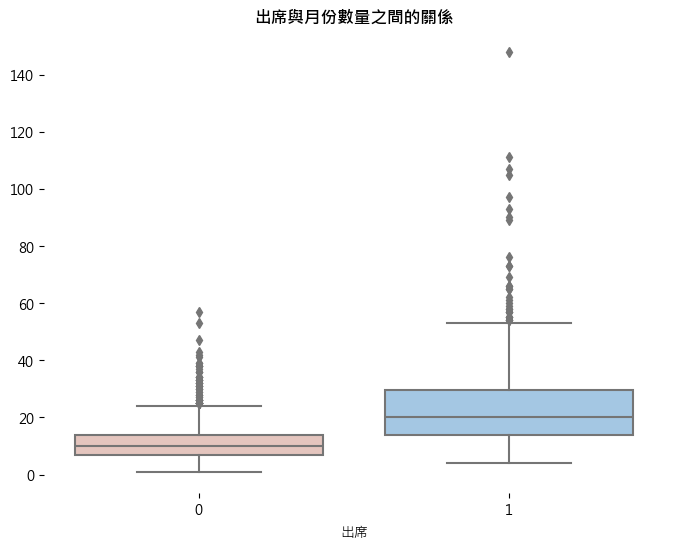

In [183]:
#設置圖形大小
plt.figure(figsize=(8, 6))

#繪製箱形圖
sns.boxplot(data=df, x='attended', y='months_as_member', orient='v', palette = ["#ebc1b7", "#9ac8ed"])

#設置標籤和標題
plt.xlabel('出席')
plt.ylabel("")
plt.title('出席與月份數量之間的關係', size=12, weight="bold")

#美化圖表
sns.despine(left=True, bottom=True)

#展示圖表
plt.show()

In [184]:
#這張圖是一個箱形圖，它用來顯示「出席」和「會員月份」之間的關係。
#X軸代表出席狀態，分為0（未出席）和1（已出席）兩個類別。
#Y軸代表會員的月份數量。箱形圖能夠展示出數據的分佈情況，包括中位數、四分位數以及極端值。

"""
箱子的解釋如下：

箱子的中間線：代表中位數，即數據的中間點。
箱子的上下邊緣：分別代表第三四分位數（Q3）和第一四分位數（Q1），即數據分佈的上下四分之一。
箱子上下的橫線：展示了數據的變異範圍，通常是到第一四分位數以下1.5倍的四分位距（IQR）和到第三四分位數以上1.5倍的四分位距。超出這個範圍的點被認為是極端值或離群值。
單獨的點：代表極端值或離群值，表示這些點的數據值與大多數數據相比非常異常。

從圖表中我們可以觀察到：
出席（1）的箱形較未出席（0）的箱形要高，這可能意味著經常出席的會員往往已經加入了較長的時間。
兩個類別的數據都有一些極端值，特別是在未出席類別中。
出席組的數據變異範圍比未出席組的要大，這表明出席組的會員月份有較大的差異。

總的來說，這個箱形圖提供了出席與會員月份之間關係的視覺表示，顯示了那些經常出席健身班的會員可能已經加入了更長時間。
"""

'\n箱子的解釋如下：\n\n箱子的中間線：代表中位數，即數據的中間點。\n箱子的上下邊緣：分別代表第三四分位數（Q3）和第一四分位數（Q1），即數據分佈的上下四分之一。\n箱子上下的橫線：展示了數據的變異範圍，通常是到第一四分位數以下1.5倍的四分位距（IQR）和到第三四分位數以上1.5倍的四分位距。超出這個範圍的點被認為是極端值或離群值。\n單獨的點：代表極端值或離群值，表示這些點的數據值與大多數數據相比非常異常。\n\n從圖表中我們可以觀察到：\n出席（1）的箱形較未出席（0）的箱形要高，這可能意味著經常出席的會員往往已經加入了較長的時間。\n兩個類別的數據都有一些極端值，特別是在未出席類別中。\n出席組的數據變異範圍比未出席組的要大，這表明出席組的會員月份有較大的差異。\n\n總的來說，這個箱形圖提供了出席與會員月份之間關係的視覺表示，顯示了那些經常出席健身班的會員可能已經加入了更長時間。\n'

In [185]:
# 我們在數據集中發現了異常值
# 讓我們移除這些異常值
# 計算四分位距（IQR）
Q1 = df['months_as_member'].quantile(0.25)
Q3 = df['months_as_member'].quantile(0.75)
IQR = Q3 - Q1

# 定義異常值的下限和上限
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

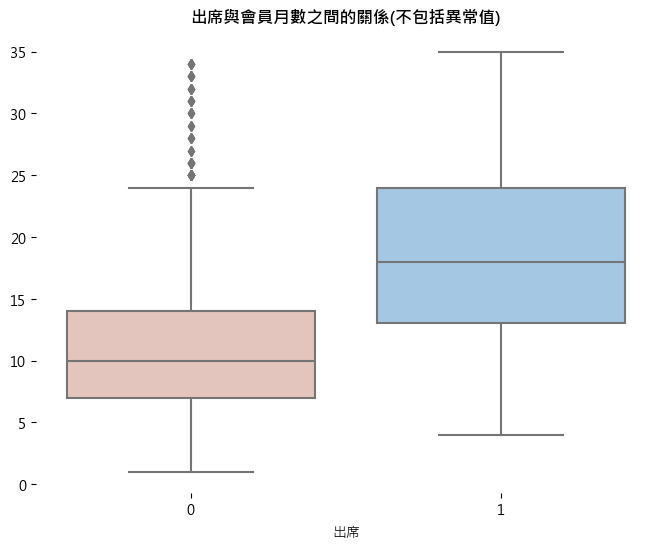

In [186]:
# 篩選掉異常值

#篩選去除異常值的數據
df1 = df[(df['months_as_member'] >= lower_bound) & (df['months_as_member'] <= upper_bound)]

#設置圖形大小
plt.figure(figsize=(8, 6))

#繪製箱形圖
sns.boxplot(data=df1, x='attended', y='months_as_member', orient='v',palette = ["#ebc1b7", "#9ac8ed"])

#設置標籤和標題
plt.ylabel('Number of Months as a Member')
plt.xlabel('出席')
plt.ylabel("")
plt.title('出席與會員月數之間的關係(不包括異常值)', size=12, weight="bold")

#美化圖表
sns.despine(left=True, bottom=True)

#展示圖表
plt.show()

In [187]:
"""
這張圖是一個箱形圖，但這次排除了異常值。
排除異常值後的箱形圖有助於更清楚地看到數據的一般分佈情況，而不是被極端值影響。這樣可以提供更準確的描述性統計數據，因為極端值可能會歪曲數據的中心趨勢和變異。

這個圖表中可以觀察到：
未出席（0）的會員月份的中位數較低，這意味著未出席的會員中位數的會員資歷較短。
已出席（1）的會員月份的中位數較高，這表明出席次數較多的會員通常會員資歷較長。
未出席組的數據分佈較窄，表明這些會員的會員資歷差異較小。
已出席組的數據分佈較廣，表明這些會員的會員資歷差異較大。

綜上所述，這張箱形圖提供了一種更淨化的視角，來觀察出席與會員月份之間的關係。
"""

'\n這張圖是一個箱形圖，但這次排除了異常值。\n排除異常值後的箱形圖有助於更清楚地看到數據的一般分佈情況，而不是被極端值影響。這樣可以提供更準確的描述性統計數據，因為極端值可能會歪曲數據的中心趨勢和變異。\n\n這個圖表中可以觀察到：\n未出席（0）的會員月份的中位數較低，這意味著未出席的會員中位數的會員資歷較短。\n已出席（1）的會員月份的中位數較高，這表明出席次數較多的會員通常會員資歷較長。\n未出席組的數據分佈較窄，表明這些會員的會員資歷差異較小。\n已出席組的數據分佈較廣，表明這些會員的會員資歷差異較大。\n\n綜上所述，這張箱形圖提供了一種更淨化的視角，來觀察出席與會員月份之間的關係。\n'

In [188]:
"""
Task 5

為了進行建模，我們需要進行數據預處理。進行了以下更改：
- 使用虛擬變量將所有對象變量轉換為數值變量，適用於分類和時間。
- 移除了超過 1.5*IQR 的異常值。
"""

'\nTask 5\n\n為了進行建模，我們需要進行數據預處理。進行了以下更改：\n- 使用虛擬變量將所有對象變量轉換為數值變量，適用於分類和時間。\n- 移除了超過 1.5*IQR 的異常值。\n'

In [189]:
df1.info() #查看數據內容(名稱、非空值數量和數據類型)

<class 'pandas.core.frame.DataFrame'>
Index: 1397 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   booking_id        1397 non-null   int64  
 1   months_as_member  1397 non-null   int64  
 2   weight            1397 non-null   float64
 3   days_before       1397 non-null   int64  
 4   day_of_week       1397 non-null   int64  
 5   time              1397 non-null   object 
 6   category          1397 non-null   object 
 7   attended          1397 non-null   int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 98.2+ KB


In [190]:
df1 = pd.get_dummies(df1, columns=['category', 'time'],drop_first=True)
df1

,booking_id,months_as_member,weight,days_before,day_of_week,attended,category_Cycling,category_HIIT,category_Strength,category_Yoga,category_unknown,time_PM
0,1,17,79.56,8,3,0,False,False,True,False,False,True
1,2,10,79.01,2,1,0,False,True,False,False,False,False
2,3,16,74.53,14,7,0,False,False,True,False,False,False
3,4,5,86.12,10,5,0,True,False,False,False,False,False
4,5,15,69.29,8,4,0,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,1496,21,79.51,10,5,0,False,True,False,False,False,False
1496,1497,29,89.55,2,1,0,False,False,True,False,False,False
1497,1498,9,87.38,4,2,0,False,True,False,False,False,False
1498,1499,34,68.64,14,7,0,False,False,False,False,False,False


In [191]:
# 將所有預測變量複製到X數據框中
X = df1.drop('attended', axis=1)  # df1是預處理後的數據框
# 將目標複製到y數據框中。
y = df1[['attended']]

In [192]:
# 導入機器學習模型和性能指標
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn import metrics

In [193]:
"""
Task 6

邏輯回歸分類器，以使用提供的數據預測成員是否會參加。
"""

# 將數據集分割為70%的訓練集和30%的測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

#建立和訓練邏輯回歸模型：
regression_model = LogisticRegression()
regression_model.fit(X_train, y_train)

LogisticRegression()

In [194]:
"""
Task 7

隨機森林分類器，以使用提供的數據預測成員是否會參加。
"""

#建立和訓練隨機森林分類器：
rfcl = RandomForestClassifier(n_estimators = 50, random_state=1)
rfcl = rfcl.fit(X_train, y_train)

In [195]:
"""
Task 8

模型評估參數
- 基於預測健身課程出席情況的具體任務，我考慮了精確度、召回率和 F1 分數。
- 精確度、召回率和 F1 分數是在處理不平衡數據時特別重要的評估指標。
"""

'\nTask 8\n\n模型評估參數\n- 基於預測健身課程出席情況的具體任務，我考慮了精確度、召回率和 F1 分數。\n- 精確度、召回率和 F1 分數是在處理不平衡數據時特別重要的評估指標。\n'

0.7976190476190477


<Axes: >

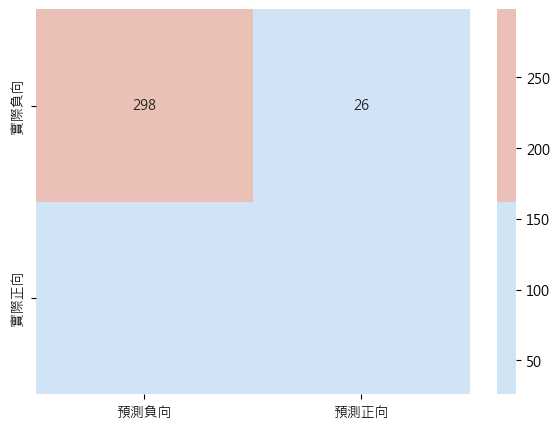

In [196]:
# 對於邏輯回歸分類器
#邏輯回歸分類器的測試集預測、性能評估，並創建了一個混淆矩陣的熱力圖。

#使用邏輯回歸模型進行預測：
y_predict = regression_model.predict(X_test)

#評估模型性能：
print(regression_model.score(X_test, y_test))

#創建混淆矩陣：
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

#將混淆矩陣轉換為 DataFrame
df_cm = pd.DataFrame(cm, index = [i for i in ["實際負向","實際正向"]],
                  columns = [i for i in ["預測負向","預測正向"]])

#繪製混淆矩陣的熱力圖：
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, cmap=["#d0e4f5", "#ebc1b7"],annot=True ,fmt='g')
#混淆矩陣是一種非常有用的工具，用於可視化分類模型的性能，特別是在區分模型對不同類別的預測能力方面。每個格子的值表示實際類別與預測類別之間的關係，例如真陽性（True Positives）、假陰性（False Negatives）等。

In [197]:
"""
這張圖是一個混淆矩陣的熱力圖，它用於顯示邏輯回歸模型在測試集上的性能。
"實際負向" 行代表實際未出席的案例。
"實際正向" 行代表實際出席的案例。
"預測負向" 列代表模型預測未出席的案例。
"預測正向" 列代表模型預測出席的案例。

混淆矩陣的每個格子表示如下：
左上格子（實際未出席，預測未出席）：模型正確預測了298個未出席的案例。
右上格子（實際未出席，預測出席）：模型錯誤預測了26個實際未出席的案例為出席。
左下和右下：這些值被截斷了，因此不顯示具體數字。

數字 0.7976190476190477 是模型的準確率，意味著模型正確預測了約79.8%的案例。
"""

'\n這張圖是一個混淆矩陣的熱力圖，它用於顯示邏輯回歸模型在測試集上的性能。\n"實際負向" 行代表實際未出席的案例。\n"實際正向" 行代表實際出席的案例。\n"預測負向" 列代表模型預測未出席的案例。\n"預測正向" 列代表模型預測出席的案例。\n\n混淆矩陣的每個格子表示如下：\n左上格子（實際未出席，預測未出席）：模型正確預測了298個未出席的案例。\n右上格子（實際未出席，預測出席）：模型錯誤預測了26個實際未出席的案例為出席。\n左下和右下：這些值被截斷了，因此不顯示具體數字。\n\n數字 0.7976190476190477 是模型的準確率，意味著模型正確預測了約79.8%的案例。\n'

In [198]:
#使用 scikit-learn 的性能評估函數來計算模型在測試數據上的精確度（precision）、召回率（recall）和 F1 分數。

#精確度（Precision）：
precision = precision_score(y_test, y_predict)

#召回率（Recall）：
recall = recall_score(y_test, y_predict)

#F1 分數（F1-Score）：
f1 = f1_score(y_test, y_predict)

#打印結果：
print("精確度（出席預測）:", precision)
print("召回率（識別實際出席者）:", recall)
print("F1分數（精確度和召回率的平衡）:", f1)

精確度（出席預測）: 0.5873015873015873
召回率（識別實際出席者）: 0.3854166666666667
F1分數（精確度和召回率的平衡）: 0.46540880503144655


0.780952380952381


<Axes: >

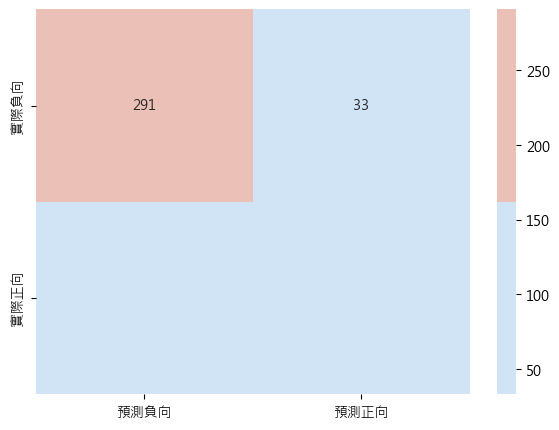

In [199]:
# 對於隨機森林分類器
#隨機森林分類器測試集預測，計算了模型的準確度，並創建了混淆矩陣的熱力圖。

#使用隨機森林模型進行預測：
y_predict = rfcl.predict(X_test)

#評估模型性能：
print(rfcl.score(X_test, y_test))

#創建混淆矩陣：
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

#將混淆矩陣轉換為 DataFrame：
df_cm = pd.DataFrame(cm, index = [i for i in ["實際負向","實際正向"]],
                  columns = [i for i in ["預測負向","預測正向"]])

#繪製混淆矩陣的熱力圖：
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, cmap=["#d0e4f5", "#ebc1b7"],annot=True ,fmt='g')

In [200]:
"""
這張圖同樣是一個混淆矩陣的熱力圖，用於展示隨機森林分類器在測試集上的性能。
"實際負向" 行代表實際未出席的案例。
"實際正向" 行代表實際出席的案例。
"預測負向" 列代表模型預測未出席的案例。
"預測正向" 列代表模型預測出席的案例。

混淆矩陣的每個格子表示如下：
左上格子（實際未出席，預測未出席）：模型正確預測了291個未出席的案例。
右上格子（實際未出席，預測出席）：模型錯誤預測了33個實際未出席的案例為出席。
左下格子 和 右下格子 的數值被截斷了，因此不顯示具體數字。


數字 0.780952380952381 代表模型的準確率，意味著模型正確預測了約78.1%的案例。
"""

'\n這張圖同樣是一個混淆矩陣的熱力圖，用於展示隨機森林分類器在測試集上的性能。\n"實際負向" 行代表實際未出席的案例。\n"實際正向" 行代表實際出席的案例。\n"預測負向" 列代表模型預測未出席的案例。\n"預測正向" 列代表模型預測出席的案例。\n\n混淆矩陣的每個格子表示如下：\n左上格子（實際未出席，預測未出席）：模型正確預測了291個未出席的案例。\n右上格子（實際未出席，預測出席）：模型錯誤預測了33個實際未出席的案例為出席。\n左下格子 和 右下格子 的數值被截斷了，因此不顯示具體數字。\n\n\n數字 0.780952380952381 代表模型的準確率，意味著模型正確預測了約78.1%的案例。\n'

In [201]:
#使用 scikit-learn 的性能評估函數來計算和打印隨機森林分類器在測試數據上的精確度（precision）、召回率（recall）和 F1 分數。

#從 scikit-learn 的 metrics 模塊中導入了三個重要的性能評估函數。
from sklearn.metrics import precision_score, recall_score, f1_score

#精確度（Precision）：
precision = precision_score(y_test, y_predict)

#召回率（Recall）：
recall = recall_score(y_test, y_predict)

#F1 分數（F1-Score）：
f1 = f1_score(y_test, y_predict)

#打印結果：
print("精確度（出席預測）:", precision)
print("召回率（識別實際出席者）:", recall)
print("F1分數（精確度和召回率的平衡）:", f1)

精確度（出席預測）: 0.5285714285714286
召回率（識別實際出席者）: 0.3854166666666667
F1分數（精確度和召回率的平衡）: 0.44578313253012053


In [202]:
"""
Task 9

模型性能比較 
哪個模型表現更好以及為什麼?

<邏輯回歸模型>
準確率：79.8%
精確度（出席預測）：58.7%
召回率（識別實際出席者）：38.5%
F1分數（精確度和召回率的平衡）：46.5%


<隨機森林模型>
準確率：78.1%
精確度（出席預測）：52.9%
召回率（識別實際出席者）：38.5%
F1分數（精確度和召回率的平衡）：44.6%


<未來預測的選擇>
考慮到出席預測，邏輯回歸表現更好。
它顯示出更高的準確率，更好的精確度、召回率和F1分數。
推薦使用邏輯回歸來預測未來的出席情況。
"""

'\nTask 9\n\n模型性能比較 \n哪個模型表現更好以及為什麼?\n\n<邏輯回歸模型>\n準確率：79.8%\n精確度（出席預測）：58.7%\n召回率（識別實際出席者）：38.5%\nF1分數（精確度和召回率的平衡）：46.5%\n\n\n<隨機森林模型>\n準確率：78.1%\n精確度（出席預測）：52.9%\n召回率（識別實際出席者）：38.5%\nF1分數（精確度和召回率的平衡）：44.6%\n\n\n<未來預測的選擇>\n考慮到出席預測，邏輯回歸表現更好。\n它顯示出更高的準確率，更好的精確度、召回率和F1分數。\n推薦使用邏輯回歸來預測未來的出席情況。\n'